<h1 align='center'> Building models for covid-19
    

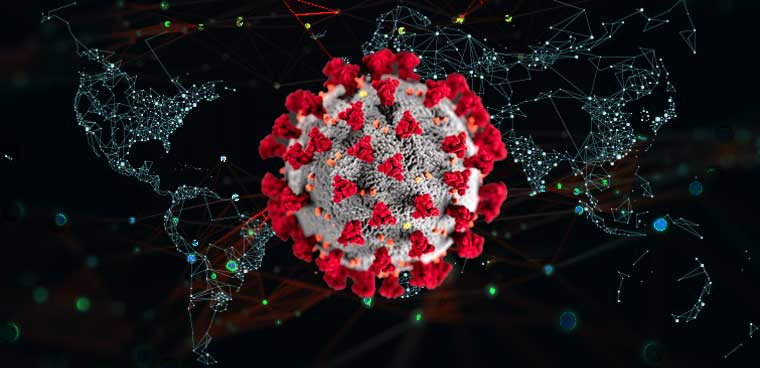

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Grouped_Data.csv', parse_dates = ['Date'])

In [4]:
data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0


In [5]:
data.shape

(32364, 6)

## Subsetting data to get details about India

In [6]:
india_df = data[data['Country/Region'] == 'India']

In [7]:
india_df.shape

(174, 6)

# Time series Model Building

In [8]:
#Importing seaborn and Matplotlib Library
import seaborn as sns
from matplotlib import pyplot as plt

#Importing statsmodel Library - which helps in time series
import statsmodels.api as sm

### Decompose the data

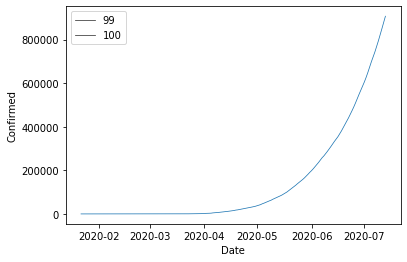

In [9]:
#To view distribution of confirmed cases details with time frame
sns.lineplot(x="Date", y="Confirmed", data=india_df, size=100)

Text(0.5, 1.0, 'Confirmed cases Distribution')

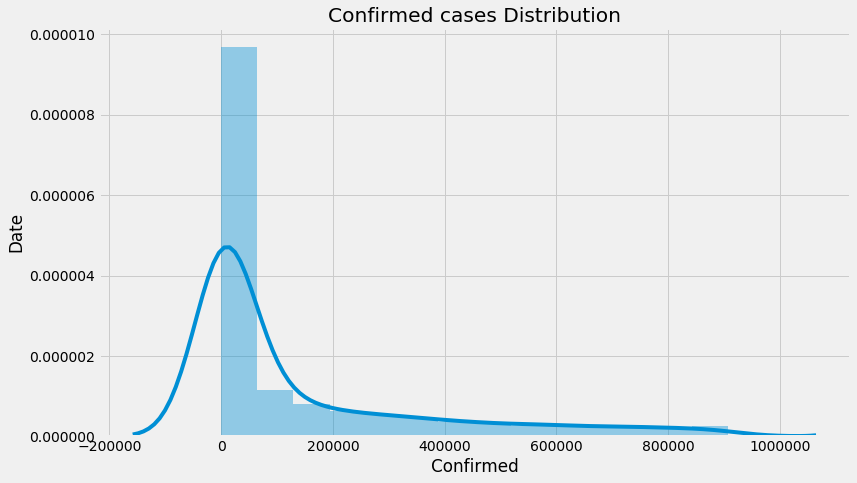

In [10]:
#To understand Target attribute distribution(Confirmed cases)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(india_df.Confirmed)
plt.xlabel("Confirmed")
plt.ylabel("Date")
plt.title("Confirmed cases Distribution")

In [11]:
visu_train = india_df

In [12]:
visu_train.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
78,2020-01-22,India,0,0,0.0,0.0
264,2020-01-23,India,0,0,0.0,0.0
450,2020-01-24,India,0,0,0.0,0.0
636,2020-01-25,India,0,0,0.0,0.0
822,2020-01-26,India,0,0,0.0,0.0


In [13]:
#Taking log of target attribute - to view distribution clearly
visu_train['LogConfirmed'] = np.sqrt(india_df['Confirmed'])

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Confirmed cases Distribution')

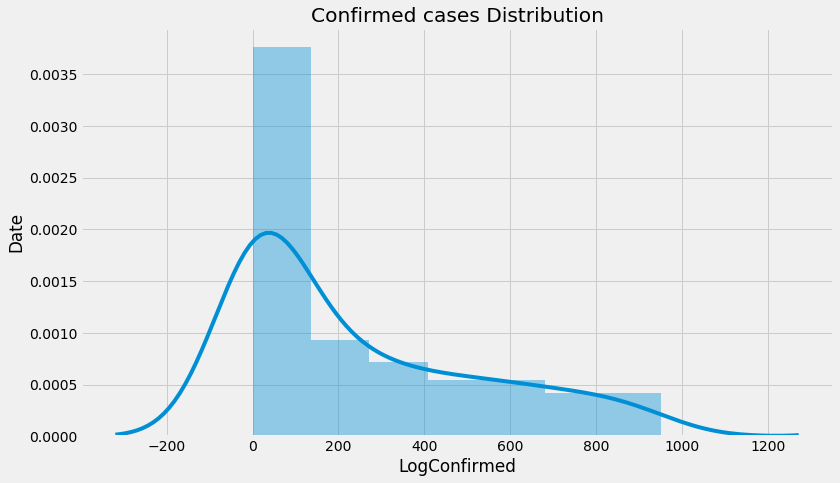

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(visu_train.LogConfirmed)
plt.xlabel("LogConfirmed")
plt.ylabel("Date")
plt.title("Confirmed cases Distribution")

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

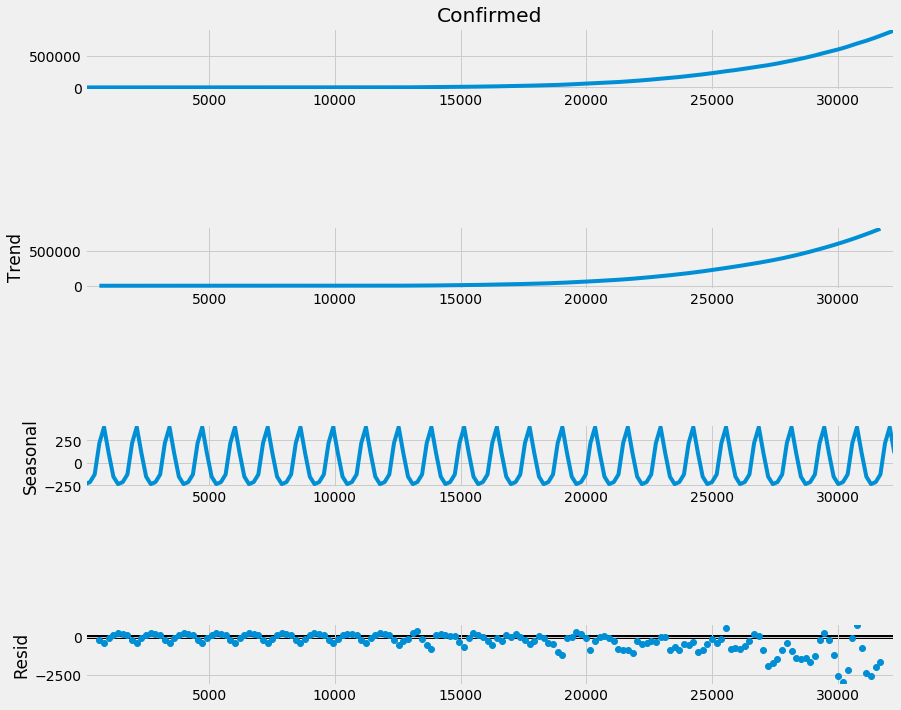

In [15]:
#Decompose the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(india_df['Confirmed'], model = 'additive', freq=7)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

**Observation:**
      _Decomposes plot showing of Lineartrend_

In [16]:
#Creating function for ploting stationarity

from statsmodels.tsa.stattools import adfuller
    
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

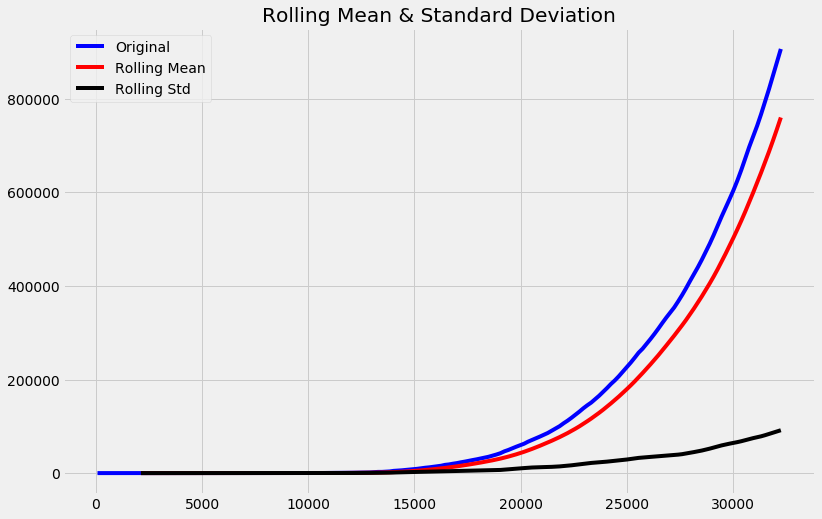

Results of Dickey-Fuller Test:
p-value = 0.8681. The series is likely non-stationary.
Test Statistic                  -0.612664
p-value                          0.868095
#Lags Used                      16.000000
Number of Observations Used    157.000000
Critical Value (1%)             -3.472703
Critical Value (5%)             -2.880132
Critical Value (10%)            -2.576683
dtype: float64


In [17]:
#Calling stationarity function
test_stationarity(india_df['Confirmed'])

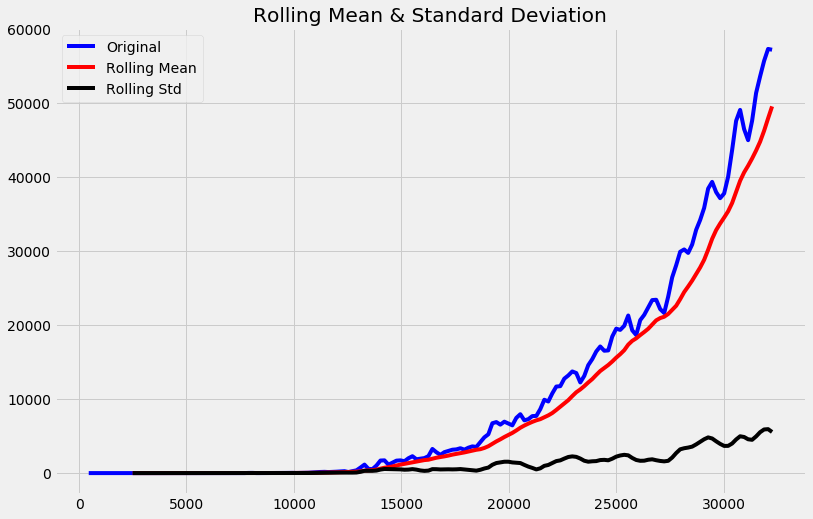

Results of Dickey-Fuller Test:
p-value = 1.0000. The series is likely non-stationary.
Test Statistic                   3.337868
p-value                          1.000000
#Lags Used                      19.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [18]:
#Doing first order difference

first_diff = india_df.Confirmed - india_df.Confirmed.shift(2)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

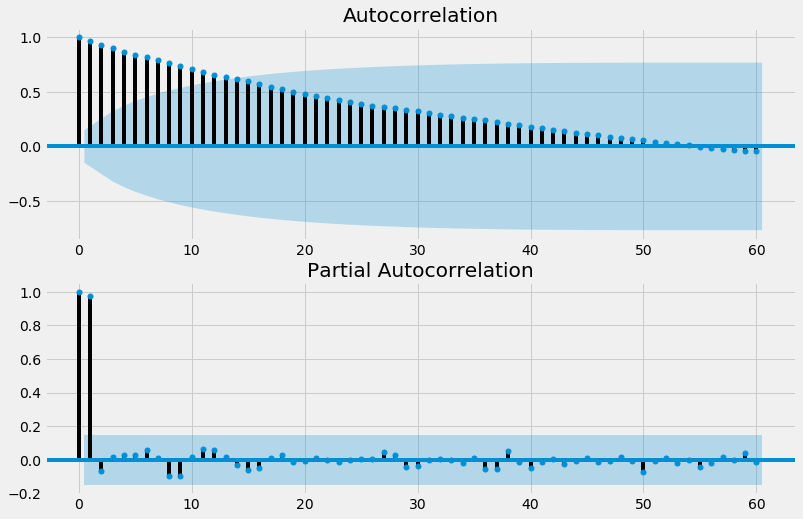

In [19]:
#Plotting ACF, PACF plot  - Differenced data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=60, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=60, ax=ax2)# 

In [20]:
india_df = india_df.reset_index()
india_df.head()

,index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,LogConfirmed
0,78,2020-01-22,India,0,0,0.0,0.0,0.0
1,264,2020-01-23,India,0,0,0.0,0.0,0.0
2,450,2020-01-24,India,0,0,0.0,0.0,0.0
3,636,2020-01-25,India,0,0,0.0,0.0,0.0
4,822,2020-01-26,India,0,0,0.0,0.0,0.0


In [21]:
#Train Test split
train = india_df[:140]
val = india_df[140:]

In [22]:
print(train.shape)
print(val.shape)

(140, 8)
(34, 8)


In [23]:
#Building ARIMA model
arima_mod = sm.tsa.ARIMA(train.Confirmed, (5,2,0)).fit(disp=False)
print(arima_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:           D2.Confirmed   No. Observations:                  138
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -1023.095
Method:                       css-mle   S.D. of innovations            400.479
Date:                Sat, 01 Aug 2020   AIC                           2060.191
Time:                        18:54:58   BIC                           2080.682
Sample:                             2   HQIC                          2068.518
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 70.0573     23.227      3.016      0.003      24.533     115.582
ar.L1.D2.Confirmed    -0.5542      0.085     -6.528      0.000      -0.721      -0.388
ar.L2.D2.Confirmed  

In [24]:
val.index.min(), val.index.max()

(140, 173)

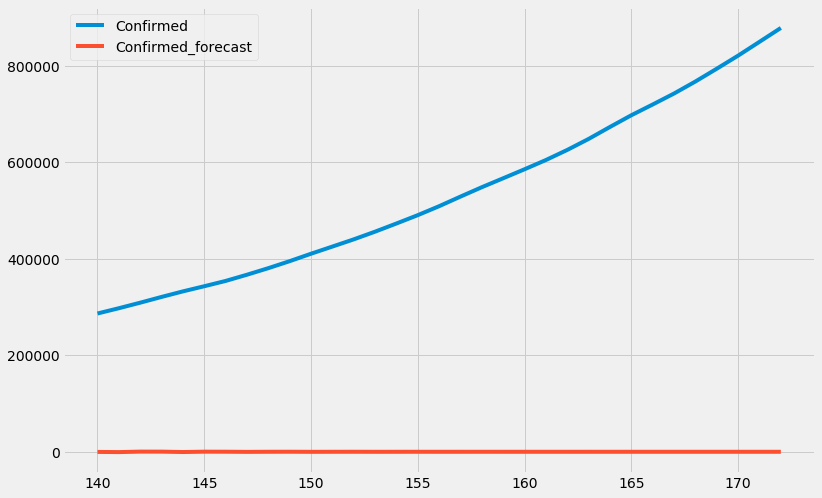

In [25]:
#Forecasting on Validation Data set
start_index = 140
end_index = 173
india_df['Confirmed_forecast'] = arima_mod.predict(start = start_index, end= end_index, dynamic= True)  
india_df[start_index:end_index][['Confirmed', 'Confirmed_forecast']].plot(figsize=(12, 8))

**Arima doesnot have seasonal factor, so it is not giving proper result**

## Handling seasonality by SARIMA model

In [26]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(india_df.Confirmed, trend = 't', order=(5,2,1), seasonal_order=(1, 1, 0, 30),  initialization='approximate_diffuse').fit()
print(sarima_mod6.summary())

C:\Users\hanit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                      SARIMAX Results                                      
Dep. Variable:                           Confirmed   No. Observations:                  174
Model:             SARIMAX(5, 2, 1)x(1, 1, [], 30)   Log Likelihood               -1386.525
Date:                             Sat, 01 Aug 2020   AIC                           2791.049
Time:                                     18:55:07   BIC                           2819.481
Sample:                                          0   HQIC                          2802.583
                                             - 174                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          3.7422      0.937      3.993      0.000       1.905       5.579
ar.L1         -0.1421      

In [27]:
val['sarimaforecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


NormaltestResult(statistic=44.08806792352941, pvalue=2.6693018749741044e-10)


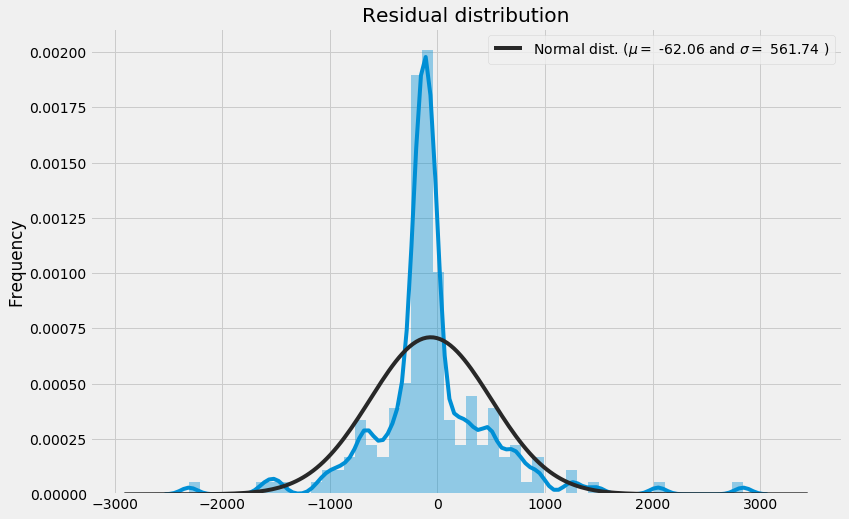

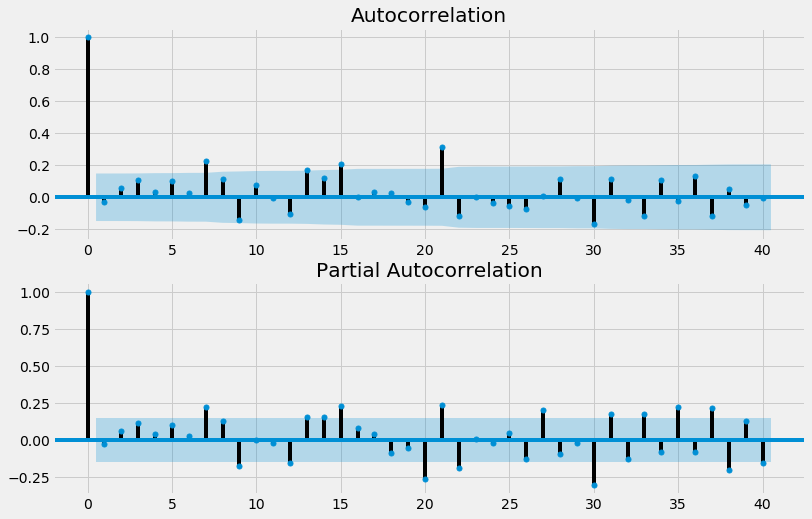

In [28]:
from scipy import stats
from scipy.stats import normaltest

resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarima_mod6.resid, lags=40, ax=ax2)


In [29]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
mape = mean_absolute_percentage_error(val['Confirmed'],  val['sarimaforecast'])
mape

1.035785942770327

In [31]:
val.tail()

,index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,LogConfirmed,sarimaforecast
169,31512,2020-07-09,India,793802,21604,495513.0,276685.0,890.955667,778666.745729
170,31698,2020-07-10,India,820916,22123,515386.0,283407.0,906.044149,802501.151479
171,31884,2020-07-11,India,849522,22673,534618.0,292231.0,921.695177,826508.594815
172,32070,2020-07-12,India,878254,23174,553471.0,301609.0,937.152069,851326.162333
173,32256,2020-07-13,India,906752,23727,571460.0,311565.0,952.235265,876935.980335


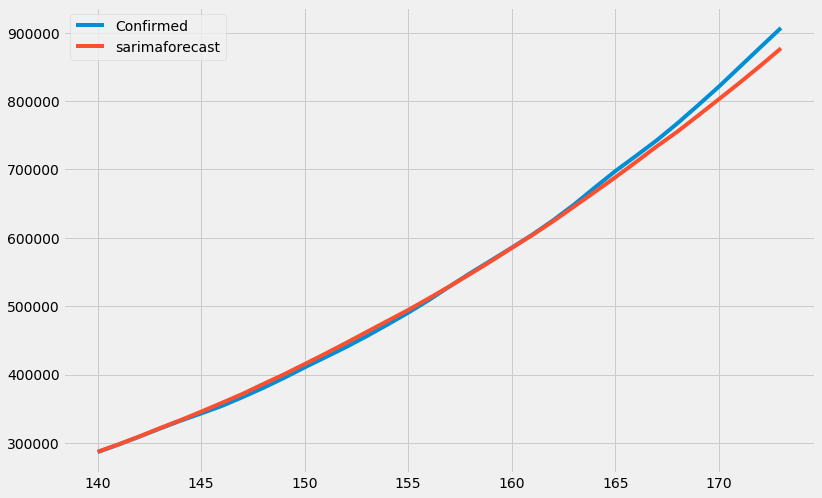

In [32]:
val[['Confirmed', 'sarimaforecast']].plot(figsize=(12, 8))

In [33]:
n1 = sarima_mod6.forecast(steps= 30)
pred1 = list(n1)

In [34]:
Confirmed_pred = [np.round(num) for num in pred1]

In [37]:
def get_prediction(data, steps):
    sarima = sm.tsa.statespace.SARIMAX(data, trend = 't', order=(5,2,1), seasonal_order=(1, 1, 0, 30),  initialization='approximate_diffuse').fit()
    forecast = sarima_mod6.forecast(steps= steps)
    pred = list(forecast)
    final_pred = [np.round(num) for num in pred]
    return final_pred

In [38]:
deathPrediction = get_prediction(india_df.Deaths,30 )
activeprediction = get_prediction(india_df.Active, 30)

C:\Users\hanit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\hanit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\hanit\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
activeprediction[:10]

[935225.0,
 964001.0,
 993348.0,
 1024293.0,
 1056771.0,
 1089657.0,
 1123487.0,
 1157389.0,
 1191616.0,
 1226995.0]

In [39]:
val.tail()

,index,Date,Country/Region,Confirmed,Deaths,Recovered,Active,LogConfirmed,sarimaforecast
169,31512,2020-07-09,India,793802,21604,495513.0,276685.0,890.955667,778666.745729
170,31698,2020-07-10,India,820916,22123,515386.0,283407.0,906.044149,802501.151479
171,31884,2020-07-11,India,849522,22673,534618.0,292231.0,921.695177,826508.594815
172,32070,2020-07-12,India,878254,23174,553471.0,301609.0,937.152069,851326.162333
173,32256,2020-07-13,India,906752,23727,571460.0,311565.0,952.235265,876935.980335


## Configuring for Predictions

In [44]:
#Creating new Dataframe
predictionForIndia = pd.DataFrame()

#Creating date attribute
date_preds = pd.Series(pd.date_range(start='2020-07-14', periods= 30))

In [45]:
predictionForIndia['date_preds'] = date_preds
predictionForIndia['Confirmed_pred'] = Confirmed_pred
predictionForIndia['DeathPrediction'] = deathPrediction
predictionForIndia['Activeprediction'] = activeprediction

In [46]:
predictionForIndia.head()

,date_preds,Confirmed_pred,DeathPrediction,Activeprediction
0,2020-07-14,935225.0,935225.0,935225.0
1,2020-07-15,964001.0,964001.0,964001.0
2,2020-07-16,993348.0,993348.0,993348.0
3,2020-07-17,1024293.0,1024293.0,1024293.0
4,2020-07-18,1056771.0,1056771.0,1056771.0


## Other Models

In [96]:
om_data = pd.read_csv('Grouped_Data.csv', parse_dates = ['Date'])

In [97]:
om_data['day'] = om_data['Date'].dt.day
om_data['month'] = om_data['Date'].dt.month
om_data['dayofweek'] = om_data['Date'].dt.dayofweek
om_data['dayofyear'] = om_data['Date'].dt.dayofyear
om_data['quarter'] = om_data['Date'].dt.quarter
om_data['weekofyear'] = om_data['Date'].dt.weekofyear

In [98]:
om_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,day,month,dayofweek,dayofyear,quarter,weekofyear
0,2020-01-22,Afghanistan,0,0,0.0,0.0,22,1,2,22,1,4
1,2020-01-22,Albania,0,0,0.0,0.0,22,1,2,22,1,4
2,2020-01-22,Algeria,0,0,0.0,0.0,22,1,2,22,1,4
3,2020-01-22,Andorra,0,0,0.0,0.0,22,1,2,22,1,4
4,2020-01-22,Angola,0,0,0.0,0.0,22,1,2,22,1,4


In [101]:
om_data.nunique()

Date               174
Country/Region     186
Confirmed         9435
Deaths            3163
Recovered         6499
Active            7565
day                 31
month                7
dayofweek            7
dayofyear          174
quarter              3
weekofyear          26
dtype: int64

In [102]:
om_data = om_data.drop(['Date'],1)

In [103]:
om_data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,day,month,dayofweek,dayofyear,quarter,weekofyear
0,Afghanistan,0,0,0.0,0.0,22,1,2,22,1,4
1,Albania,0,0,0.0,0.0,22,1,2,22,1,4
2,Algeria,0,0,0.0,0.0,22,1,2,22,1,4
3,Andorra,0,0,0.0,0.0,22,1,2,22,1,4
4,Angola,0,0,0.0,0.0,22,1,2,22,1,4


## Train-test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
om_data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'day',
       'month', 'dayofweek', 'dayofyear', 'quarter', 'weekofyear'],
      dtype='object')

In [106]:
Y = om_data.Confirmed
X = om_data[['Country/Region', 'day','month', 'dayofweek','dayofyear', 'quarter', 'weekofyear']]

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(21683, 7) (21683,)
(10681, 7) (10681,)


In [110]:
X_train.dtypes

Country/Region    category
day                  int64
month                int64
dayofweek            int64
dayofyear            int64
quarter              int64
weekofyear           int64
dtype: object

In [109]:
X_train['Country/Region'] = X_train['Country/Region'].astype('category')

C:\Users\hanit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

X_train[['Country/Region']] = oe.fit_transform(X_train.loc[:,['Country/Region']])
X_test[['Country/Region']] = oe.fit_transform(X_test.loc[:,['Country/Region']])

In [114]:
X_train.head()

,Country/Region,day,month,dayofweek,dayofyear,quarter,weekofyear
26504,92.0,12,6,4,164,2,24
9934,76.0,15,3,6,75,1,11
7003,121.0,28,2,4,59,1,9
11623,91.0,24,3,1,84,1,13
27485,143.0,17,6,2,169,2,25


In [ ]:
oe = OrdinalEncoder()
train[['Province_State','Country_Region']] = oe.fit_transform(train.loc[:,['Province_State','Country_Region']])

##  Model Building
### LGBM

In [124]:
!pip install setuptools wheel numpy scipy scikit-learn -U

  Using cached setuptools-49.2.0-py3-none-any.whl (789 kB)
Requirement already up-to-date: wheel in c:\users\hanit\anaconda3\lib\site-packages (0.34.2)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.2.0.post20200210
    Uninstalling setuptools-45.2.0.post20200210:
      Successfully uninstalled setuptools-45.2.0.post20200210
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1


ERROR: tensorflow 1.14.0 requires google-pasta>=0.1.6, which is not installed.
ERROR: torchvision 0.6.1 has requirement torch==1.5.1, but you'll have torch 1.3.1+cpu which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\hanit\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\hanit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [151]:
from lightgbm import LGBMRegressor

In [153]:
lgbm = LGBMRegressor(n_estimators=1300)
lgbm.fit(X_train,Y_train)
pred_lg = lgbm.predict(X_test)

In [154]:
mae  = round(mean_absolute_error(pred_lg, Y_test),2)
print('maeLGBM: ', mae)

maeLGBM:  1803.79


### Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [131]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

In [145]:
mae  = round(mean_absolute_error(pred, Y_test),2)
print('maeRF: ', mae)

maeRF:  436.31


###  XGBoost

In [149]:
!pip install xgboost
!pip install lightgbm

You should consider upgrading via the 'C:\Users\hanit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\hanit\anaconda3\python.exe -m pip install --upgrade pip' command.


In [150]:
from xgboost import XGBRegressor


In [155]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train,Y_train)
pred_xgb = xgb.predict(X_test)

In [156]:
mae  = round(mean_absolute_error(pred_xgb, Y_test),2)
print('maeXGB: ', mae)

maeXGB:  1854.96


**Colclusions**
 * sarima model gives mape of 1.3%
 * But other models like RandomForest, XGBoost, LGBM models does not give proper result since the data is time dependent

<h2 align = 'center', style=color:purple> Stay HOME stay safe